In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia


 61% 15.0M/24.8M [00:00<00:00, 81.1MB/s]
100% 24.8M/24.8M [00:00<00:00, 108MB/s] 


In [ ]:
!unzip "/content/freshwater-fish-disease-aquaculture-in-south-asia.zip"

Archive:  /content/freshwater-fish-disease-aquaculture-in-south-asia.zip
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (1).jpeg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (1).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (1).png  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (10).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (11).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (116).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (117).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Tes

In [ ]:
# import os
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image

# # Choose a random class directory
# class_dir = os.path.join(train_path, os.listdir(train_path)[3])  # Assuming first class directory

# # Get list of image files in the chosen class directory
# image_files = [file for file in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, file))]

# # Choose a random image file
# image_file = os.path.join(class_dir, image_files[0])  # Assuming first image file

# # Load and display the image with higher resolution
# img = image.load_img(image_file, target_size=(300, 300))  # Adjust target_size for higher resolution
# plt.imshow(img)
# plt.axis('off')
# plt.show()


Found 1747 images belonging to 7 classes.
Found 697 images belonging to 7 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
54/54 [==============================] - 36s 420ms/step - loss: 2.1502 - accuracy: 0.1994 - val_loss: 1.6362 - val_accuracy: 0.4033 - lr: 1.0000e-04
Epoch 2/10
54/54 [==============================] - 22s 407ms/step - loss: 1.7299 - accuracy: 0.3423 - val_loss: 1.4587 - val_accuracy: 0.4688 - lr: 1.0000e-04
Epoch 3/10
54/54 [==============================] - 22s 413ms/step - loss: 1.5648 - accuracy: 0.4012 - val_loss: 1.3520 - val_accuracy: 0.5298 - lr: 1.0000e-04
Epoch 4/10
54/54 [==============================] - 22s 401ms/step - loss: 1.4533 - accuracy: 0.4676 - val_loss: 1.2276 - val_accuracy: 0.5670 - lr: 1.0000e-04
Epoch 5/10
54/54 [==============================] - 22s 398ms/step - loss: 1.3426 - accuracy: 0.5207 - val_loss: 1.1434 - val_accuracy: 0.6295 - lr: 1.0000e-04
Epoch 6/10
54/54 [==============================] - 22

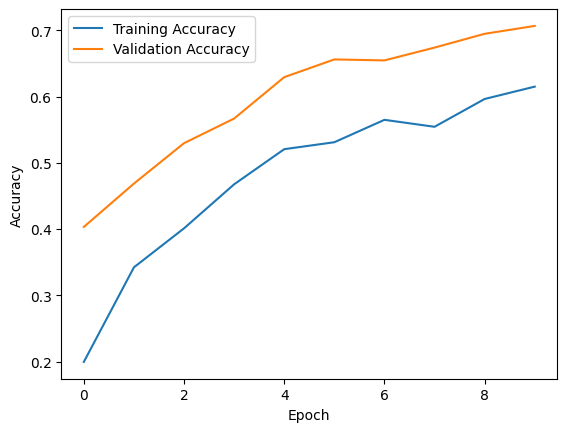

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define paths
train_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Train"
test_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Test"

# Parameters
image_size = (224, 224)
batch_size = 32
epochs = 10
learning_rate = 0.0001  # Adjusted learning rate

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add classification head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)  # Add dense layer
x = layers.Dropout(0.5)(x)  # Add dropout layer
predictions = layers.Dense(7, activation='softmax')(x)  # Assuming 6 disease classes

# Create model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[lr_scheduler]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Found 1747 images belonging to 7 classes.
Found 697 images belonging to 7 classes.
Epoch 1/5
54/54 [==============================] - 35s 410ms/step - loss: 1.9127 - accuracy: 0.2251 - val_loss: 2.0497 - val_accuracy: 0.1443 - lr: 0.0010
Epoch 2/5
54/54 [==============================] - 22s 412ms/step - loss: 1.7964 - accuracy: 0.2927 - val_loss: 2.4331 - val_accuracy: 0.1443 - lr: 0.0010
Epoch 3/5
54/54 [==============================] - 22s 406ms/step - loss: 1.6519 - accuracy: 0.3557 - val_loss: 2.5730 - val_accuracy: 0.1562 - lr: 0.0010
Epoch 4/5
54/54 [==============================] - 22s 403ms/step - loss: 1.5665 - accuracy: 0.3930 - val_loss: 2.9131 - val_accuracy: 0.1399 - lr: 0.0010
Epoch 5/5
54/54 [==============================] - 21s 381ms/step - loss: 1.4011 - accuracy: 0.4880 - val_loss: 2.9171 - val_accuracy: 0.1518 - lr: 1.0000e-04


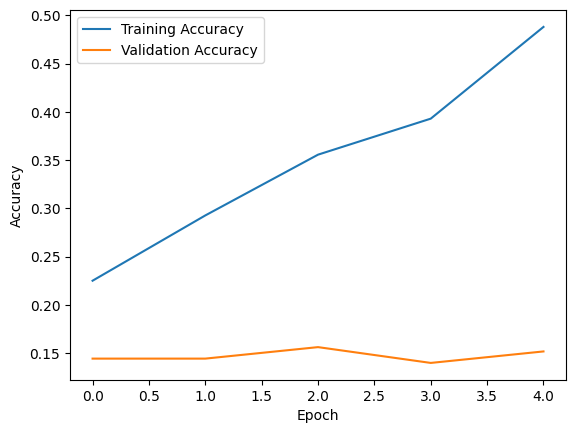

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define paths
train_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Train"
test_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Test"

# Parameters
image_size = (224, 224)
batch_size = 32
epochs = 5
learning_rate = 0.001

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define Ghost Module
class GhostModule(layers.Layer):
    def __init__(self, out_channels, ratio=2, **kwargs):
        super(GhostModule, self).__init__(**kwargs)
        self.out_channels = out_channels
        self.ratio = ratio
        self.channels_primary = out_channels // ratio
        self.channels_residual = out_channels - self.channels_primary

    def build(self, input_shape):
        self.conv_primary = layers.Conv2D(self.channels_primary, kernel_size=1, padding='same', activation='relu')
        self.conv_residual = layers.Conv2D(self.channels_residual, kernel_size=3, padding='same', activation='relu')
        self.batch_norm = layers.BatchNormalization()

    def call(self, inputs):
        primary = self.conv_primary(inputs)
        residual = self.conv_residual(primary)
        residual = self.batch_norm(residual)
        return tf.concat([primary, residual], axis=-1)

# Define GhostNet model
inputs = layers.Input(shape=(224, 224, 3))
x = layers.Conv2D(16, kernel_size=3, strides=2, padding='same', activation='relu')(inputs)
x = GhostModule(16)(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
x = GhostModule(32)(x)
x = GhostModule(32)(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
x = GhostModule(64)(x)
x = GhostModule(64)(x)
x = GhostModule(64)(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
x = GhostModule(128)(x)
x = GhostModule(128)(x)
x = GhostModule(128)(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
x = GhostModule(256)(x)
x = GhostModule(256)(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(7, activation='softmax')(x)

model = models.Model(inputs, x)

# Compile the model with reduced learning rate
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[lr_scheduler]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Found 1747 images belonging to 7 classes.
Found 697 images belonging to 7 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/5
54/54 [==============================] - 31s 469ms/step - loss: 2.2090 - accuracy: 0.1551 - val_loss: 1.9451 - val_accuracy: 0.1473 - lr: 1.0000e-04
Epoch 2/5
54/54 [==============================] - 24s 449ms/step - loss: 2.0893 - accuracy: 0.1469 - val_loss: 1.9385 - val_accuracy: 0.1711 - lr: 1.0000e-04
Epoch 3/5
54/54 [==============================] - 23s 432ms/step - loss: 2.0202 - accuracy: 0.1417 - val_loss: 1.9378 - val_accuracy: 0.1443 - lr: 1.0000e-04
Epoch 4/5
54/54 [==============================] - 23s 429ms/step - loss: 1.9737 - accuracy: 0.1452 - val_loss: 1.9286 - val_accuracy: 0.1830 - lr: 1.0000e-04
Epoch 5/5
54/54 [==============================] - 23s 427ms/step - loss: 1.9595 - accuracy: 0.1586 - val_loss: 1.9300 - val_accuracy: 0.1815 - lr: 1.0000e-04


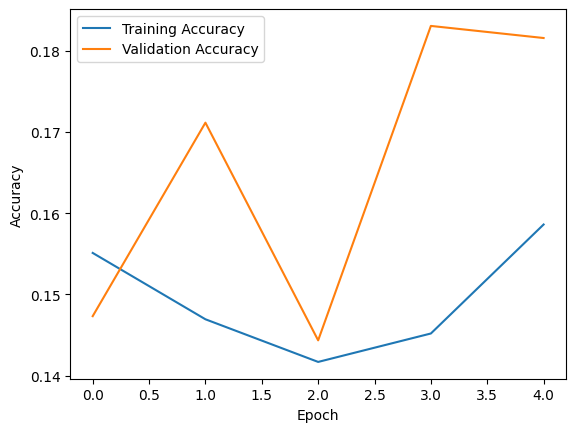

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define paths
train_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Train"
test_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Test"

# Parameters
image_size = (224, 224)
batch_size = 32
epochs = 5
learning_rate = 0.0001  # Adjusted learning rate

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained ResNet50 model
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add classification head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(7, activation='softmax')(x)  # Assuming 6 disease classes

# Create model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[lr_scheduler]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "/content/Freshwater Fish Disease Aquaculture in south asia/Train"
test_dir = "/content/Freshwater Fish Disease Aquaculture in south asia/Test"


# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Decreased rotation range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data with augmentation
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load testing data
test_dataset = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Define the number of classes
num_classes = len(train_dataset.class_indices)

# Define and compile the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Using a lower learning rate for stability
optimizer = optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print('Test loss:', loss)
print('Test accuracy:', accuracy)




Found 1747 images belonging to 7 classes.
Found 697 images belonging to 7 classes.
Epoch 1/10
55/55 [==============================] - 27s 419ms/step - loss: 2.7272 - accuracy: 0.2547 - val_loss: 2.1298 - val_accuracy: 0.1420
Epoch 2/10
55/55 [==============================] - 21s 387ms/step - loss: 1.8034 - accuracy: 0.3097 - val_loss: 4.3156 - val_accuracy: 0.1435
Epoch 3/10
55/55 [==============================] - 22s 402ms/step - loss: 1.6565 - accuracy: 0.3807 - val_loss: 6.8540 - val_accuracy: 0.1435
Epoch 4/10
55/55 [==============================] - 22s 397ms/step - loss: 1.6608 - accuracy: 0.3887 - val_loss: 8.5793 - val_accuracy: 0.1463
Epoch 5/10
55/55 [==============================] - 21s 388ms/step - loss: 1.5624 - accuracy: 0.4047 - val_loss: 9.2329 - val_accuracy: 0.1492
Epoch 6/10
55/55 [==============================] - 22s 402ms/step - loss: 1.4922 - accuracy: 0.4413 - val_loss: 9.0894 - val_accuracy: 0.1722
Epoch 7/10
55/55 [==============================] - 23s 410

Found 1747 images belonging to 7 classes.
Found 697 images belonging to 7 classes.
Epoch 1/10
54/54 [==============================] - 66s 580ms/step - loss: 1.5618 - accuracy: 0.4449 - val_loss: 2.2688 - val_accuracy: 0.1414 - lr: 1.0000e-04
Epoch 2/10
54/54 [==============================] - 29s 541ms/step - loss: 0.6960 - accuracy: 0.7650 - val_loss: 2.1971 - val_accuracy: 0.1369 - lr: 1.0000e-04
Epoch 3/10
54/54 [==============================] - 30s 550ms/step - loss: 0.3989 - accuracy: 0.8694 - val_loss: 2.1277 - val_accuracy: 0.1414 - lr: 1.0000e-04
Epoch 4/10
54/54 [==============================] - 30s 539ms/step - loss: 0.2437 - accuracy: 0.9219 - val_loss: 2.2150 - val_accuracy: 0.1488 - lr: 1.0000e-04
Epoch 5/10
54/54 [==============================] - 30s 552ms/step - loss: 0.1896 - accuracy: 0.9359 - val_loss: 2.3066 - val_accuracy: 0.1414 - lr: 1.0000e-04
Epoch 6/10
54/54 [==============================] - 30s 558ms/step - loss: 0.1500 - accuracy: 0.9551 - val_loss: 2.62

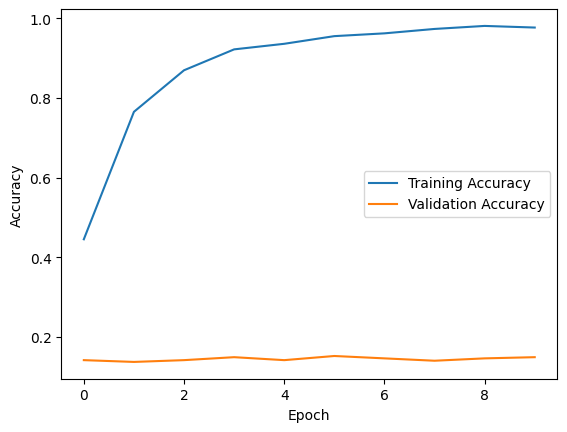

In [ ]:


import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Define paths
train_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Train"
test_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Test"

# Parameters
image_size = (224, 224)
batch_size = 32
epochs = 10
learning_rate = 0.0001

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained ResNet50 model
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Unfreeze some layers
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Add custom classification head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(7, activation='softmax')(x)  # Assuming 6 disease classes

# Create model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-6)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[lr_scheduler, early_stopping]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
final_accuracy = history.history['accuracy'][-1]
print("Accuracy after training: {:.2f}%".format(final_accuracy * 100))

Accuracy after training: 97.67%


In [ ]:
# Save the model to HDF5 file
model.save("your_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
